# K Nearest Neighbors
Author: Yuan Huang

## Introduction:
This notebook implemented K Nearest Neighbors algorithm using numpy and scipy package. The basic idea is to first calculate the distance between each observations in the training dataset and the new observation, and then assign the major votes of the k observations that are closest to the new observation. In this implementation, I used heap to maintain the labels of the k colsest observations to the new observation.

In [64]:
import numpy as np
import scipy as sp
from scipy.linalg import norm
import heapq
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
class KNN(object):
    """
    This class applies k-nearest neighbor
    Algorithm to classify new observations
    The algorithm is implemented using numpy
    and scipy
    """
    
    def __init__(self, k):
        self.k=k
        
    def predict(self, X, y, new_obs):
        """
        This function fit the training dataset with
        feature matrix X and label vector y, and predict
        the class of new_obs
        
        Inputs:
          X: featrue matric
          y: vector of label/target variable
          new_obs: vector of the new variable
        """
        if not isinstance(X,np.ndarray):
            X=np.ndarray(X)
        h=[]
        labels=[]
        for i in range(X.shape[0]):
            heapq.heappush(h,(norm(X[i]-new_obs),y[i]))
        count=self.k
        while count>0:
            _,label=heapq.heappop(h)
            labels.append(label)
            count-=1
        return max(set(labels),key=labels.count)    
    

Now, I created 3 clusters. Each cluster was generated from a multivariate normal distribution. I then generated corresponding labels for these clusters. The clusters are labeled as 0, 1, and 2, respectively. Finally, I added a new observation centered at the first cluster coresponding to label zero, as shown by the black dot in the figure.

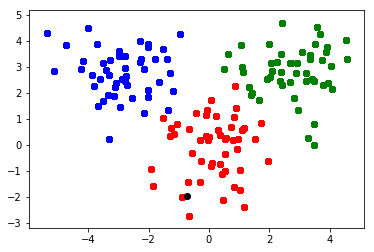

In [67]:
mean1=[0,0]
cov1=[[1,0],[0,1.0]]
cluster1 = np.random.multivariate_normal(mean1, cov1, 50)

mean2=[3,3]
cov2=[[1,0],[0,1.0]]
cluster2 = np.random.multivariate_normal(mean2, cov2, 50)

mean3=[-3,3]
cov3=[[1,0],[0,1.0]]
cluster3 = np.random.multivariate_normal(mean3, cov3, 50)

total=np.vstack([cluster1,cluster2,cluster3])
total_plot_data=np.hsplit(total,2)

labels=np.repeat([0,1,2],50)
cmap=['r','g','b']

new_obs=np.random.multivariate_normal(mean1, cov1, 1)

for c in colors:
    plt.scatter(total_plot_data[0][colors==c],total_plot_data[1][colors==c],color=cmap[c])
plt.scatter(x=new_obs[0][0],y=new_obs[0][1],c='k')    
    

I then use KNN with k=50 to predict the class of the new observation. The algorithm can correct calssify this new observation belonging to class 0. As shown below, the p

In [63]:
knn=KNN(50)
knn.predict(total,colors,new_obs)

0

## Conclusions:
1. K Nearest Neighbors algorithm was implemented using numpy and scipy package, together with a mini heap to store the labels of the k observations that are nearest to the new observation. The dominant of these k labels was assigned as the class of the new observation
2. the KNN alogrithm correctly identified the new observation among the 3 clusters generated by simulations based on multivariate normal distribution